<a href="https://colab.research.google.com/github/Eswa2020/hello-world/blob/master/Esther_wairimu_kamau_week_6_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

###  Specifying the Question


**Problem statement:**
You have been recruited as a football data analyst in a company -    **Mchezopesa Ltd **and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

**Input**: Home team, Away team, Tournament type (World cup, Friendly, Other)


**Background Information:**

Since their introduction in 1992, the FIFA World Rankings have been the subject of much debate, particularly regarding the calculation procedure and the resulting disparity between generally perceived quality and world ranking of some teams. The perceived flaws in the FIFA system have led to the creation of a number of alternative rankings from football statisticians.

The initial system was very simple, with no weighting for the quality of opponent or importance of a match. The rankings were adapted in 1999 to include weightings based on the importance of the match and the strength of the opponent. A win over a weak opponent resulted in fewer points being awarded than a win over a much stronger one. Further adaptations in 2006 were made to reduce the number of years' results considered from 8 to 4, with greater reliance on matches from within the previous 12 months.

Still, criticisms of the rankings remained, with particular anomalies being noted including: the United States rise to fourth in 2006, to the surprise of even their own players;**Israel's climb to 15th in November 2008**, which surprised the Israeli press and Belgium's rank of world number 1 in November 2015, given that Belgium had only played in one tournament final stage in the past 13 years.



In the 2010s, teams realized the ranking system could be 'gamed', specifically by avoiding playing non-competitive matches, particularly against weaker opponents.This was because the low weighting of friendlies meant that even victories could reduce a team's average score: in other words, a team could win a match and lose points. Prior to the seeding of the 2018 World Cup preliminary draw, 








###  Defining the Metric for Success

The  model will be considered successful when I develop a model with high level of accuracy.  The variables that I shall use to predict the results of a match are:
Which stadium is it played at (0 -neutral, 1-away team's stadium, 2- home team's stadium),
Whether the match is an important match or a friendly match (0 - Friendly, 1- Important),
How much the Home team's rank changes compared to the past period,
How much the Away team's rank changes compared to the past period,
Difference in the 2 team's ranking,
Difference in the 2 team's mean weighted ratings over the past 3 years

###  Data Relevance

I use two datasets provided

FIFA rankings from 1993 to 2018.
I used this to get the FIFA ranking and points for the teams, which proves to a decent predictor of team performance

International Soccer matches from 1872 to 2018.
This I will use to find out how much the difference in point, ranks and the current rank of the team affects the outcome of a match

## 2. Reading the Data

In [ ]:
# Loading the results Dataset and importing the relavant libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
print("Done")

Done


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# loading the results dataset
results_df = pd.read_csv("/content/results.csv")
# convert date from object to date type
results_df = results_df.astype({'date':'datetime64[ns]'})
results_df.head(2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [ ]:
# loading rankings dataset
fifa_ranking_df = pd.read_csv('/content/fifa_ranking.csv')

fifa_ranking_df = fifa_ranking_df.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
# convert date from object to date type
fifa_ranking_df['rank_date'] = pd.to_datetime(fifa_ranking_df['rank_date'])
fifa_ranking_df.head(2)

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0


## 3. Checking and manipulating the Data

In [ ]:
# Determining the no. of records in the datasets
#
print(results_df.shape)
print(fifa_ranking_df.shape)

(40839, 9)
(57793, 7)


In [ ]:
# Previewing the top of the dataset
#
print(results_df.head(3))
print(fifa_ranking_df.head(3))

        date home_team away_team  ...     city   country neutral
0 1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1 1873-03-08   England  Scotland  ...   London   England   False
2 1874-03-07  Scotland   England  ...  Glasgow  Scotland   False

[3 rows x 9 columns]
   rank country_full  ... two_year_ago_weighted  three_year_ago_weighted
0     1      Germany  ...                   0.0                      0.0
1     2        Italy  ...                   0.0                      0.0
2     3  Switzerland  ...                   0.0                      0.0

[3 rows x 7 columns]


In [ ]:
# Previewing the bottom of the datasets
# 
print(results_df.tail(3))
print(fifa_ranking_df.tail(3))

            date         home_team    away_team  ...       city  country neutral
40836 2019-07-19           Senegal      Algeria  ...      Cairo    Egypt    True
40837 2019-07-19        Tajikistan  North Korea  ...  Ahmedabad    India    True
40838 2019-07-20  Papua New Guinea         Fiji  ...       Apia    Samoa    True

[3 rows x 9 columns]
       rank country_full  ... two_year_ago_weighted  three_year_ago_weighted
57790   206      Eritrea  ...                   0.0                      0.0
57791   206      Somalia  ...                   0.0                      0.0
57792   206        Tonga  ...                   0.0                      0.0

[3 rows x 7 columns]


In [ ]:
# Checking whether each column has an appropriate datatype
# 
print(results_df.info())
print(fifa_ranking_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64

So we can see that each row of the results dataset is composed of :
A date, the two teams and their score, the tournament, the location : country and city and, if the location is neutral



In [ ]:
#Adding result variable to the results data set
results_df['result'] = ['Draw' if i == 0  else 'Home_Won' if i > 0  else 'Away_Won' for i in results_df['home_score'] - results_df['away_score']]
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Home_Won
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Home_Won
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Home_Won
...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,Home_Won
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,Draw
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,Away_Won
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,Away_Won


In [ ]:
#  merge the home team to get the home team ranks

rank_home = pd.merge(results_df, fifa_ranking_df, left_on= ['date', 'home_team'], 
                     right_on= ['rank_date', 'country_full'], how = 'inner')

rank_home.rename(columns={'rank' : 'rank_home'}, inplace=True)




In [ ]:
# obtaining away team ranking
rank_away = pd.merge(results_df, fifa_ranking_df, left_on=['away_team', 'date'],
                     right_on= ['country_full', 'rank_date'], how = 'inner')

rank_away.rename(columns={'rank' : 'rank_away'}, inplace=True)


In [ ]:
# obtaining the columns that I will merge with the home team table

final_rank_away = rank_away[['date','home_team', 'away_team', 'rank_away']]


In [ ]:
 # Merge home team dataframe and final away team dataframe

matches = pd.merge(rank_home, final_rank_away, left_on = ['home_team', 'away_team', 'date'],
                 right_on = ['home_team', 'away_team', 'date'], how = 'inner')


In [ ]:
# Dropping unnecessary columns in the matches data set

matches = matches.drop(columns=['country_full', 'country_abrv', 'rank_date', 'two_year_ago_weighted', 'three_year_ago_weighted', 'date', 'city',
                            'country', 'cur_year_avg_weighted'])


In [ ]:
# checking for missing values
matches.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
neutral       0
rank_home     0
rank_away     0
dtype: int64

In [ ]:
# checking for duplicates in our dataset
matches.duplicated().any()

False

## 6. Exploratory Analysis

In [ ]:
# checking for the measures of dispersion
matches.describe()

,home_score,away_score,rank_home,rank_away
count,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,69.918485
std,1.905960,1.154691,47.557993,50.497652
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,27.000000,28.000000
50%,1.000000,1.000000,58.000000,61.000000
75%,2.000000,2.000000,95.000000,102.500000
max,31.000000,9.000000,206.000000,209.000000


Text(0.5, 1.0, 'TOP 10 TYPE OF MATCH TOURNAMENTS')

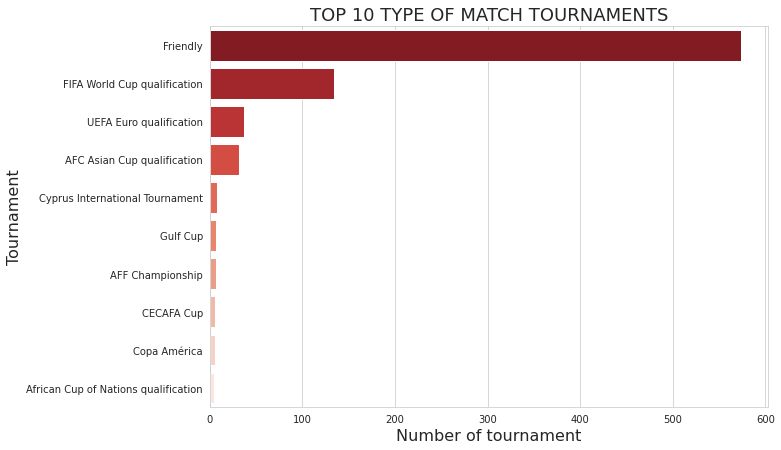

In [ ]:
# which tournament type is the most played.
tournament = matches['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (10,7))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)


The most type of matches played are friendly matches followed by FIFA World cup qualification.

Text(0.5, 1.0, 'TOP 10 OF GOAL AVERAGE PER MATCH')

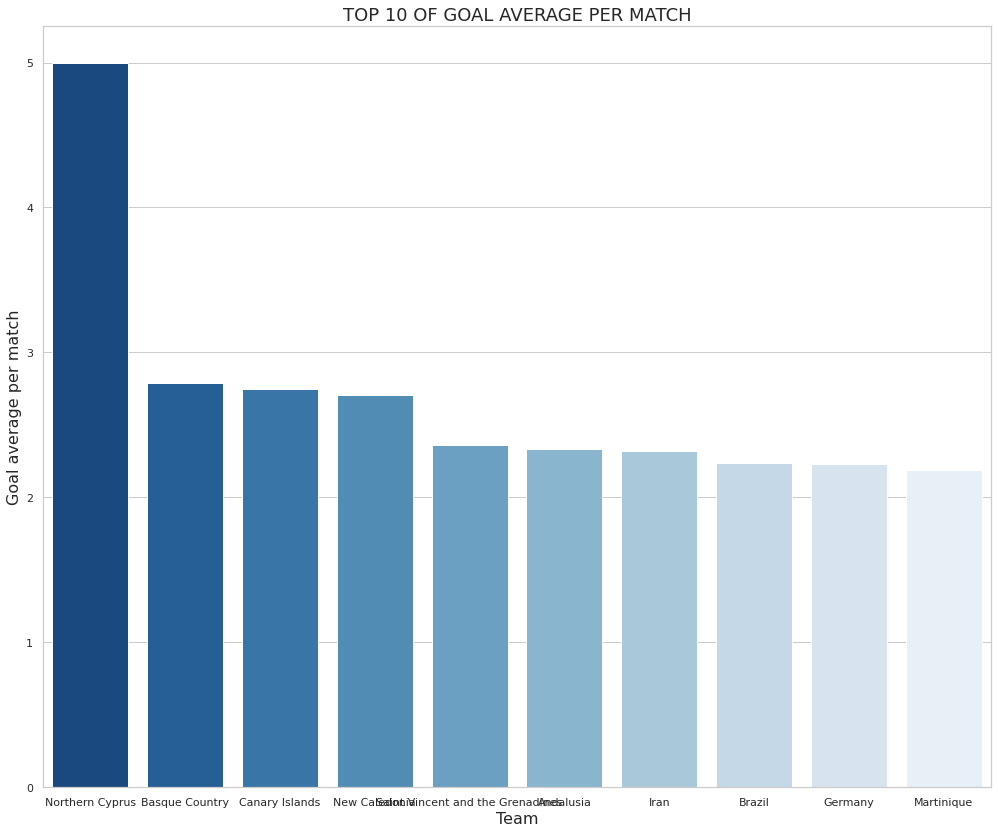

In [ ]:
# the teams that scored the most
plt.figure(figsize = (17, 14))
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:10]
sns.set_style("whitegrid")
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

Text(0.5, 1.0, 'TOP 10 OF NUMBER OF MATCHES')

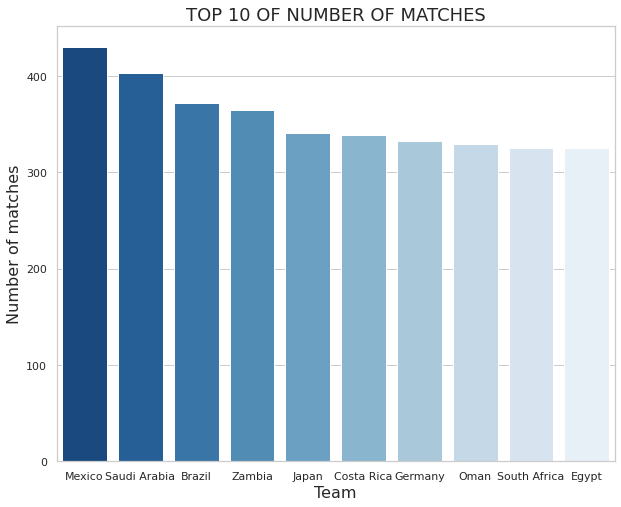

In [ ]:
# the top 10 teams who played the most matches
plt.figure(figsize = (10,8))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_matches', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_matches", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of matches', size=16)
ax.set_title("TOP 10 OF NUMBER OF MATCHES", fontsize=18)

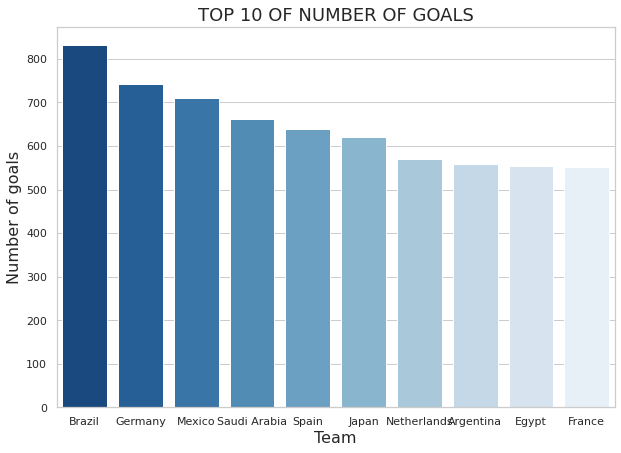

In [ ]:
# the top ten teams who scored the most goals
plt.figure(figsize = (10,7))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

del plt_data, country_info

In [ ]:
# finding the average score based on home and away
means = matches[['home_score','away_score']].mean()
means

home_score    1.632606
away_score    1.004592
dtype: float64

we can notice that, on average, the home team scored more goals than the away team

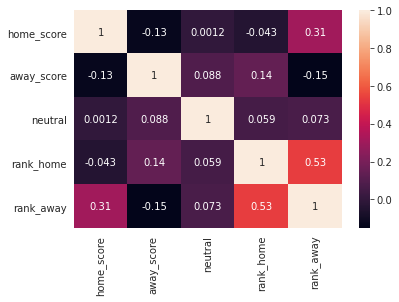

In [ ]:
# Checking the pearson correlation coefficient 

sns.heatmap(matches.corr(),annot=True)
plt.show()

## 7. Feature Engineering

Firstly, I'll join the matches with the ranks of the different teams.

Then extract some features:
- score and rank differences


In [ ]:
# feature generation

matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'


**Modelling using logistic regression**

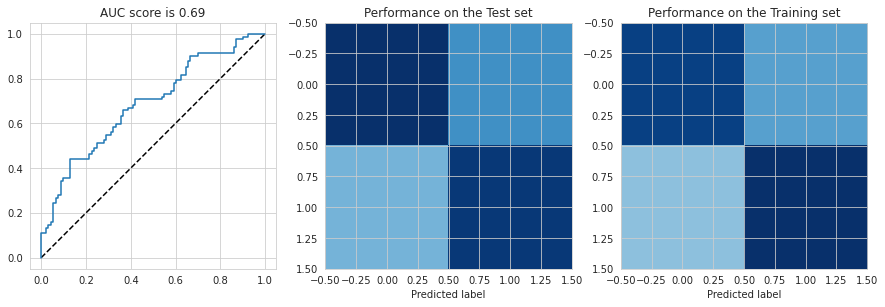

In [ ]:
# importing the relevant libraries used for regression
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = matches.loc[:,['average_rank', 'rank_difference', 'is_stake']], matches['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

AUC score provides an aggregate measure of performance across all possible classification thresholds.
I consider this pretty good performance, minding that soccer matches have typically only few goals scored and therefore making their outcome even more unpredictable. 

Stakes distribution in the wrong predictions
False    0.825397
True     0.174603
Name: is_stake, dtype: float64
Stakes distribution overall
False    0.659013
True     0.340987
Name: is_stake, dtype: float64


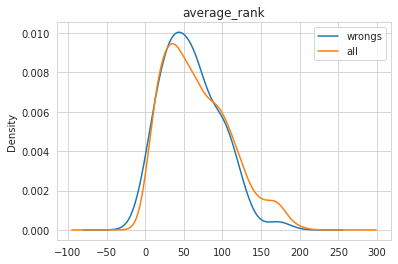

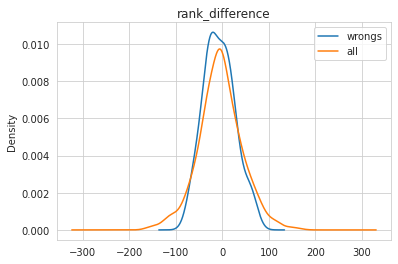

In [ ]:
# look at the bad predictions and see where the mistakes are arising from.
features = ['average_rank', 'rank_difference'] #'score_difference']
wrongs = y_test != model.predict(X_test)

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])
    
print("Stakes distribution in the wrong predictions")
print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
print("Stakes distribution overall")
print(X['is_stake'].value_counts() / X.shape[0])

From these figures, 
we predict worse for closer ranks
lower ranks in general
and somewhat for matches with no stakes (Friendly here)

**Modelling using Polynomial approach**

In [ ]:
# encoding the tournament column with numeric codes

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()
matches['tournament'] = le.fit_transform(matches['tournament'])

matches.head()

,home_team,away_team,home_score,away_score,tournament,neutral,rank_home,rank_away,rank_difference,average_rank,score_difference,is_won,is_stake
0,Bolivia,Uruguay,3,1,16,False,59,22,37,40.5,2,True,True
1,Brazil,Mexico,1,1,17,False,8,14,-6,11.0,0,False,False
2,Ecuador,Venezuela,5,0,16,False,35,94,-59,64.5,5,True,True
3,Guinea,Sierra Leone,1,0,17,False,65,86,-21,75.5,1,True,False
4,Paraguay,Argentina,1,3,16,False,67,5,62,36.0,-2,False,True


In [ ]:
# checking for multicollinearlity
matches.drop(columns=['home_score', 'away_score'])

# Display the correlations between the independent variables

correlation = matches.corr()

correlation

,home_score,away_score,tournament,neutral,rank_home,rank_away,rank_difference,average_rank,score_difference,is_won,is_stake
home_score,1.000000,-0.132413,-0.033968,0.001156,-0.043381,0.309322,-0.373297,0.157814,0.874028,0.539544,0.137465
away_score,-0.132413,1.000000,-0.002145,0.088183,0.143060,-0.151524,0.305155,-0.009871,-0.597329,-0.469734,-0.004961
tournament,-0.033968,-0.002145,1.000000,-0.034279,-0.102162,-0.085372,-0.011558,-0.106743,-0.026433,-0.021120,-0.048471
neutral,0.001156,0.088183,-0.034279,1.000000,0.059212,0.072782,-0.018140,0.075564,-0.042291,-0.022301,0.105751
rank_home,-0.043381,0.143060,-0.102162,0.059212,1.000000,0.534618,0.434050,0.867880,-0.105227,-0.117950,0.261334
rank_away,0.309322,-0.151524,-0.085372,0.072782,0.534618,1.000000,-0.529284,0.883805,0.324555,0.261971,0.338094
rank_difference,-0.373297,0.305155,-0.011558,-0.018140,0.434050,-0.529284,1.000000,-0.070835,-0.451627,-0.397685,-0.098046
average_rank,0.157814,-0.009871,-0.106743,0.075564,0.867880,0.883805,-0.070835,1.000000,0.132529,0.088696,0.343421
score_difference,0.874028,-0.597329,-0.026433,-0.042291,-0.105227,0.324555,-0.451627,0.132529,1.000000,0.666815,0.113658
is_won,0.539544,-0.469734,-0.021120,-0.022301,-0.117950,0.261971,-0.397685,0.088696,0.666815,1.000000,0.105593


In [ ]:
# calculate the variance inflation vector(VIF)
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,home_score,away_score,tournament,neutral,rank_home,rank_away,rank_difference,average_rank,score_difference,is_won,is_stake
home_score,9.963671e+13,-6.036310e+13,0.034432,0.027344,1.898766e+13,1.147702e+14,4.437475e+13,-1.147702e+14,-1.231420e+14,0.262921,-0.006713
away_score,-6.036310e+13,3.656990e+13,-0.007498,-0.105853,-1.150333e+13,-6.953149e+13,-2.688365e+13,6.953149e+13,7.460334e+13,0.042443,-0.069622
tournament,3.306277e-02,-7.540462e-03,1.013577,0.026967,-1.171007e-01,4.008778e-02,9.953325e-02,1.648987e-01,-1.352862e-02,0.013118,0.010727
neutral,2.763906e-02,-1.062105e-01,0.026967,1.023783,-9.826050e-02,3.554157e-02,1.118329e-01,2.450699e-02,-8.528883e-04,-0.009384,-0.090415
rank_home,2.273472e+13,-1.377342e+13,-0.103043,-0.105740,-6.200255e+14,-4.104560e+14,1.162708e+14,9.091066e+14,-2.809806e+13,-0.015114,0.294470
rank_away,1.146017e+14,-6.942936e+13,0.032076,0.028556,-4.293061e+14,9.486241e+14,6.587418e+14,-4.191508e+14,-1.416373e+14,1.077439,-0.287072
rank_difference,4.242956e+13,-2.570518e+13,0.100549,0.111653,1.074295e+14,6.493540e+14,2.510662e+14,-6.493540e+14,-5.243910e+13,0.726867,-0.226567
average_rank,-1.180111e+14,7.149487e+13,0.165916,0.026489,9.251401e+14,-4.361754e+14,-6.653242e+14,-4.645445e+14,1.458510e+14,-0.892779,-0.393927
score_difference,-1.231420e+14,7.460334e+13,-0.014439,-0.000065,-2.346703e+13,-1.418457e+14,-5.484319e+13,1.418457e+14,1.521923e+14,-1.347368,-0.056143
is_won,2.689644e-01,3.878170e-02,0.013118,-0.009384,-1.343588e-01,1.103544e+00,7.984982e-01,-8.072870e-01,-1.354837e+00,1.867222,-0.060791


## 8. Challenging the solution

> The procedure of the logistic approach that I used is that you calculate the probability for each individual game, and if it's above a threshold then assign the win to that team. The problem with the  logistic approach is that the team with the highest ranking will always be picked as the tournament winner. The thing we could try would be to simulate the result of each match based on your calculated probabilities, and use that to predict the probability for each team to win the tournament.






## 9. Follow up questions

### a). Did we have the right data?

Yes we had the right data for the most part of the anlysis, but I think we also needed to have data for an upcoming competition that we would predict the outcomes.

### b). Do we need other data to answer our question?

we need another dataset for an upcoming competition that we are supposed predict the outcomes

### c). Did we have the right question?

The research question was clear and focused as it clearly stated what was required